Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 15249024})


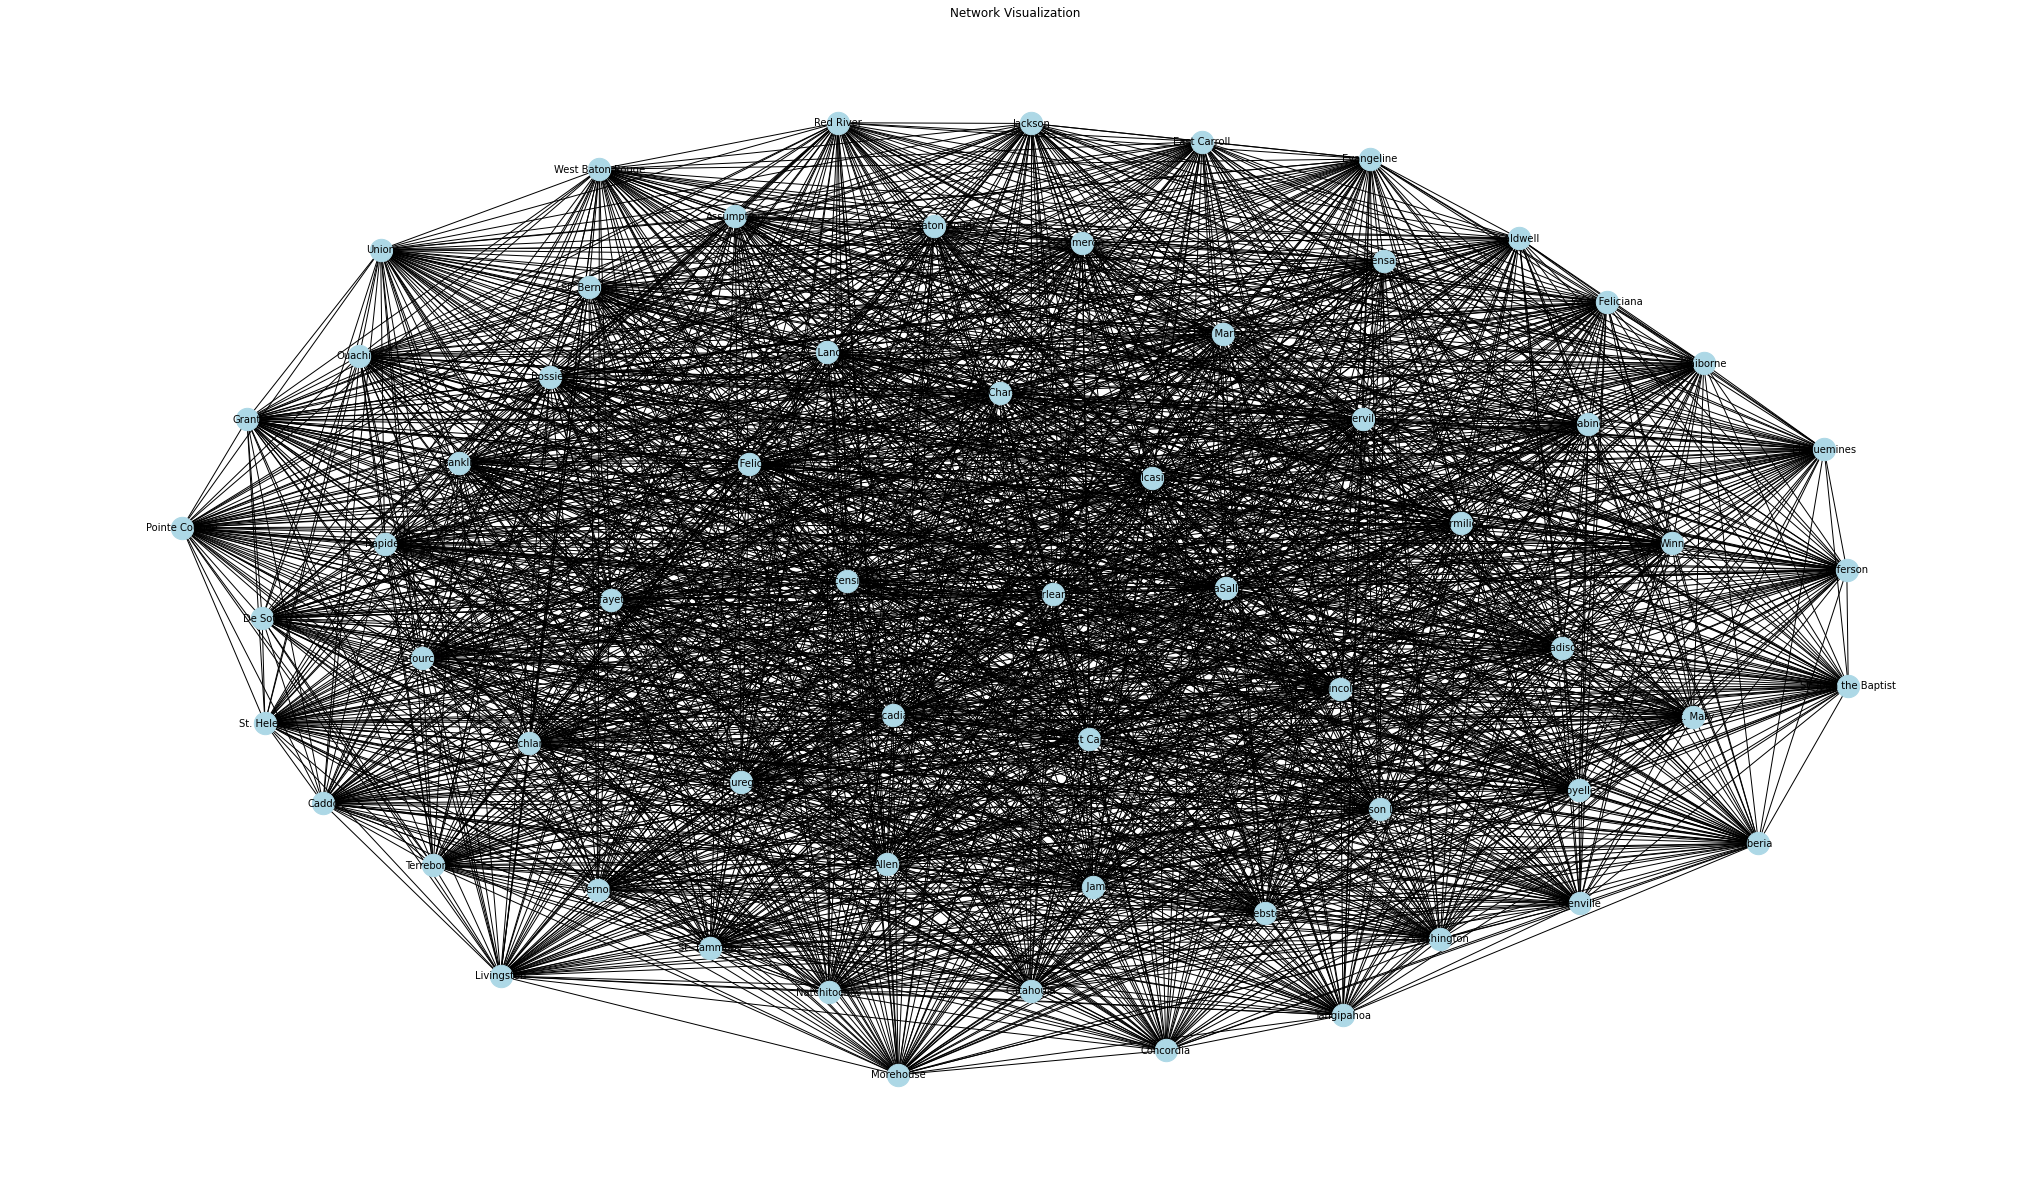

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana edge.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))

# Create edges between the targets that are common in collaboration with C4
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))

# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs
def enumerate_subgraphs(graph, k):
    k_subgraphs = []
    for node in graph.nodes():
        Vextension = set(graph.neighbors(node))
        extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = [len(sg) for sg in enumerate_subgraphs(G, 4)]
subgraph_counts = Counter(subgraph_sizes)
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edge.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))

# Create edges between the targets that are common in collaboration with C4
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))

# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)


Number of subgraphs: 1


Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 4})


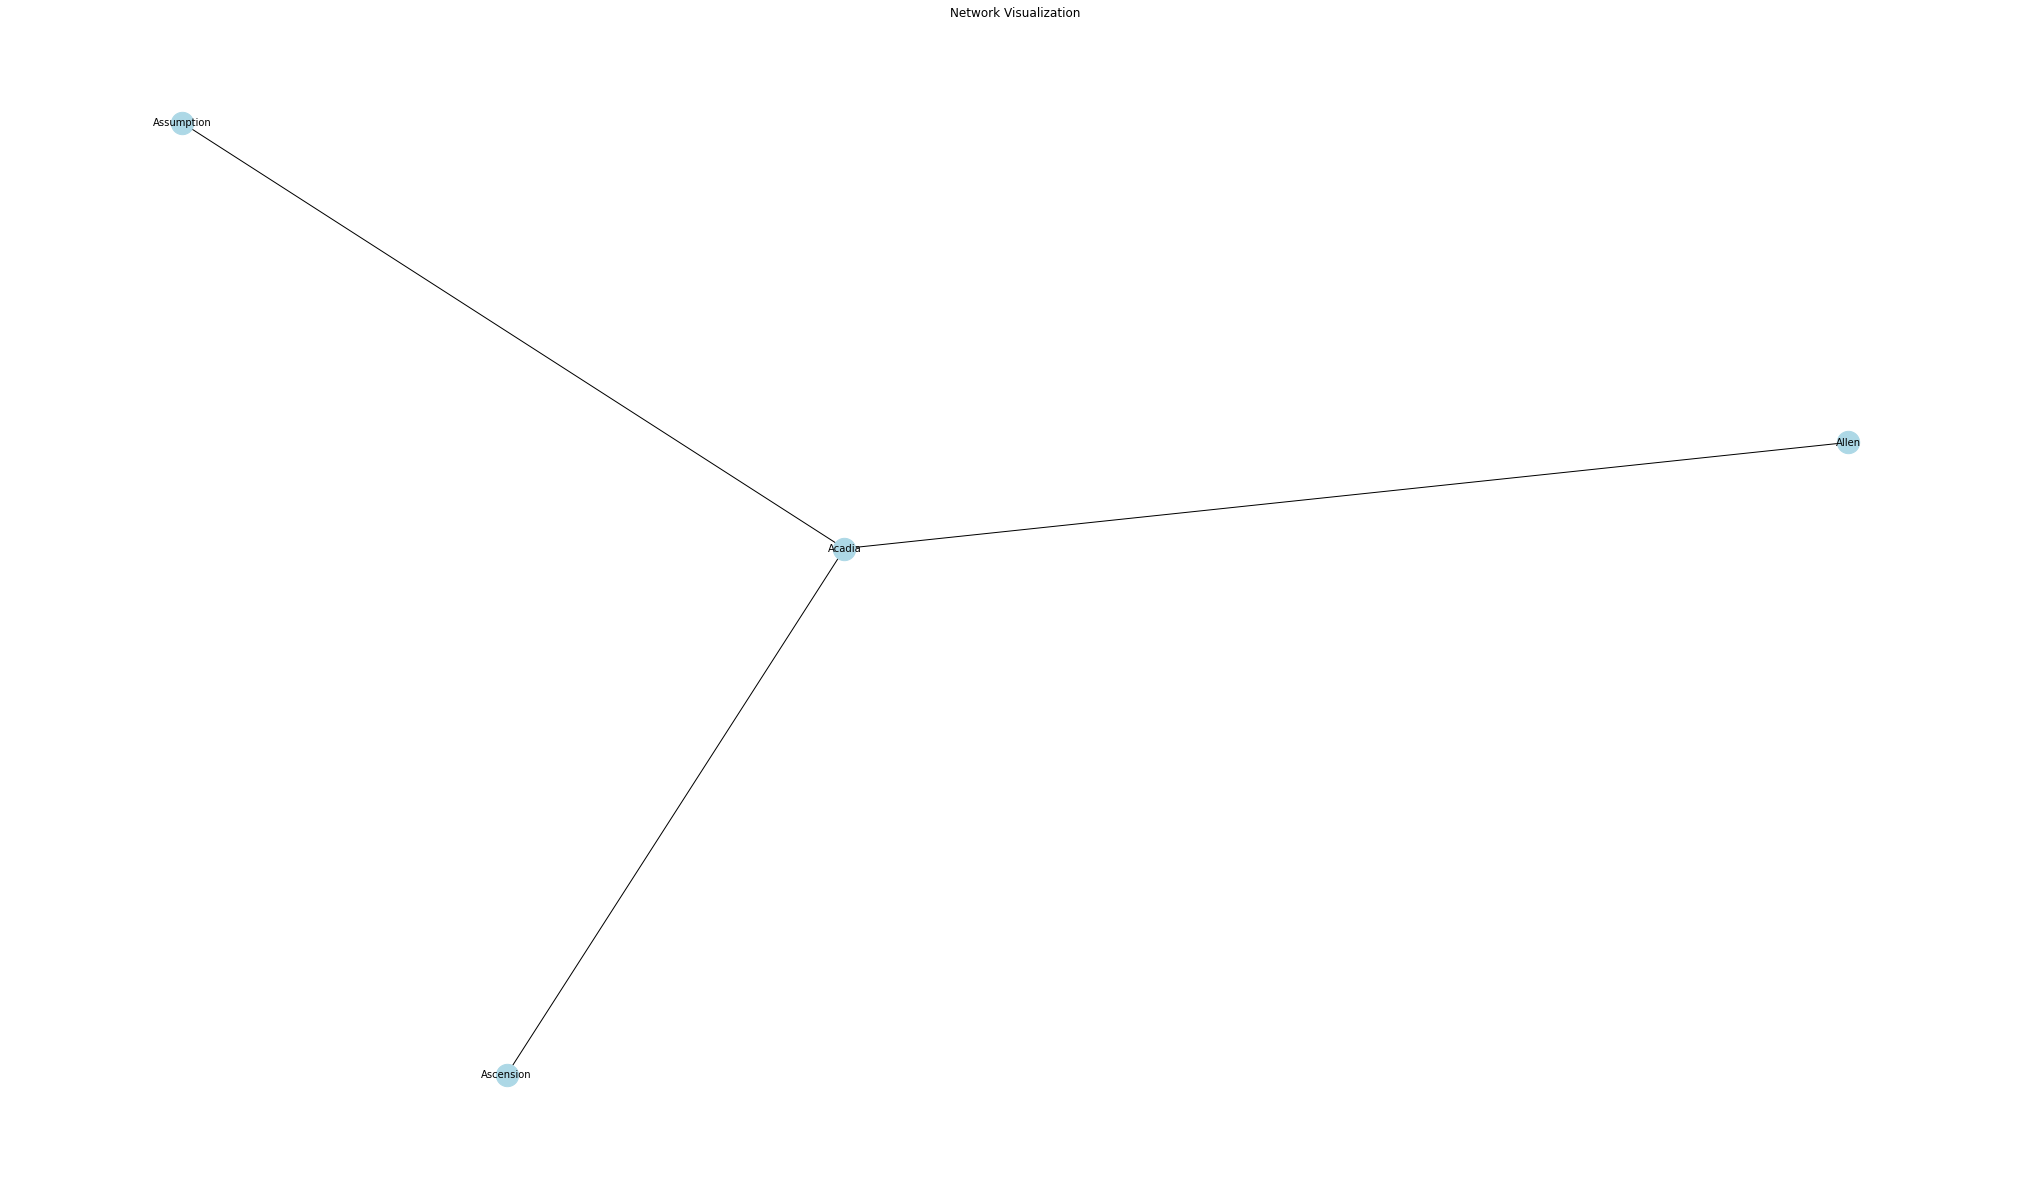

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype4.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 4})


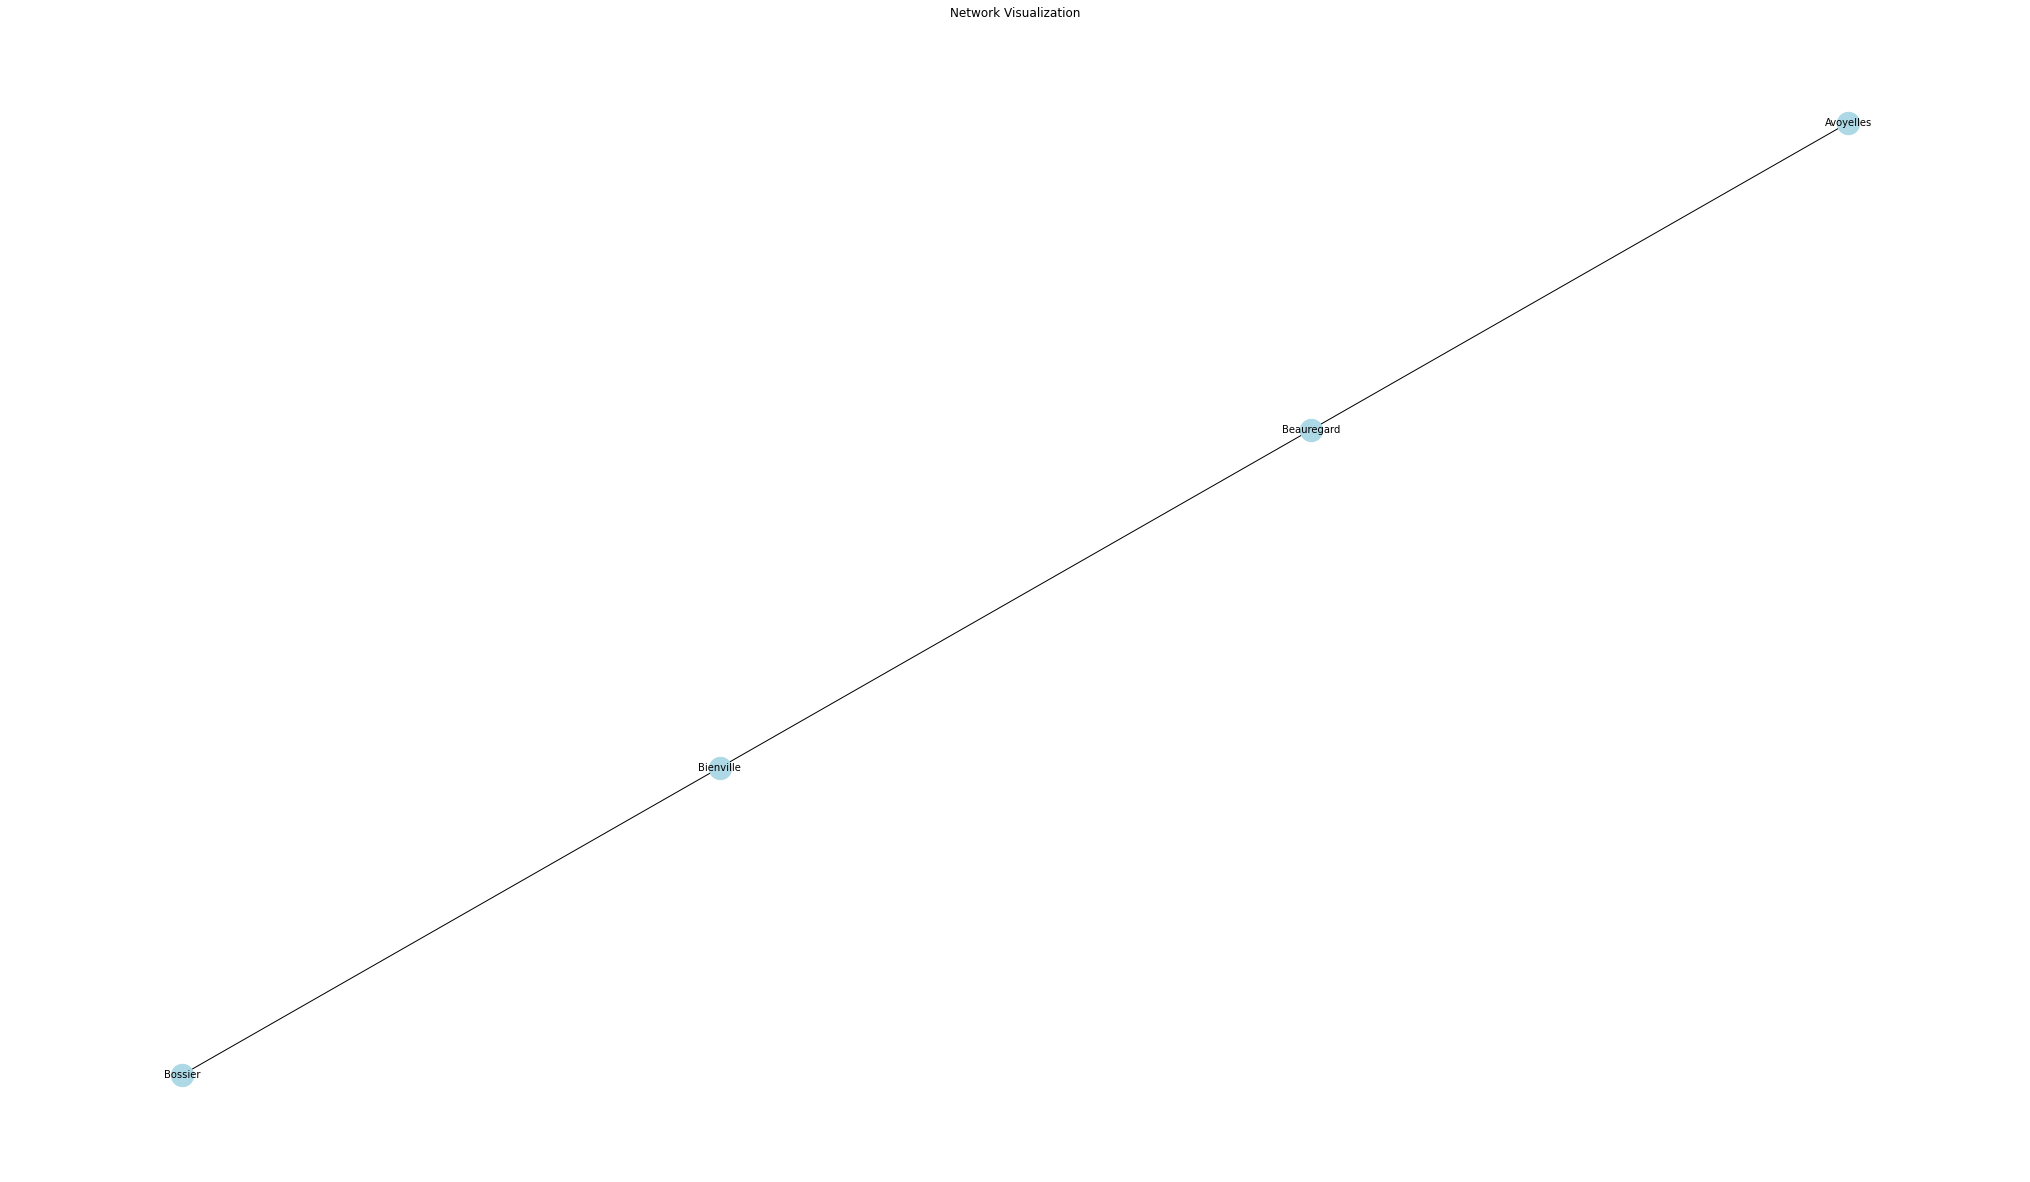

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype6.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 8})


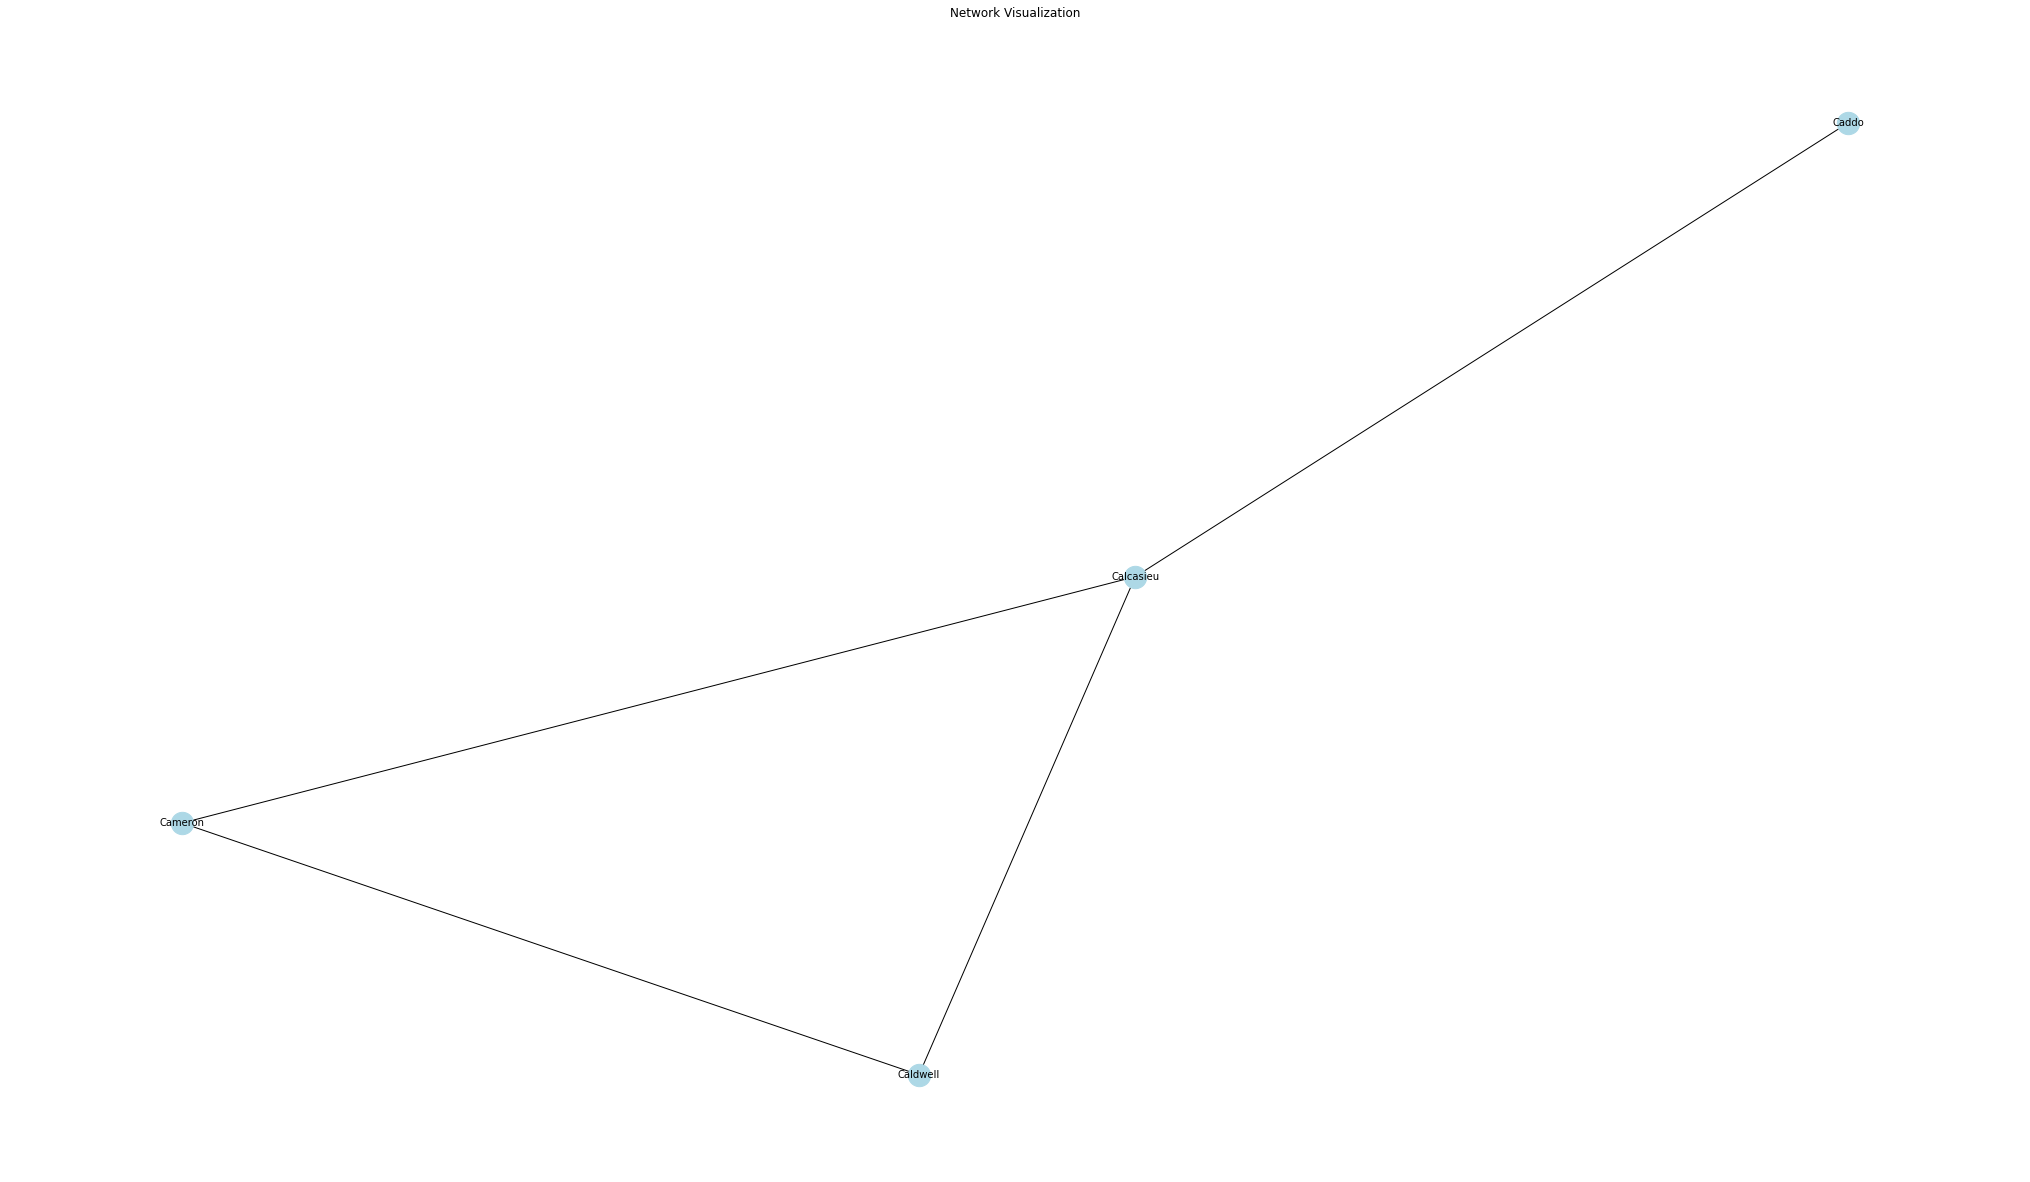

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype7.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 12})


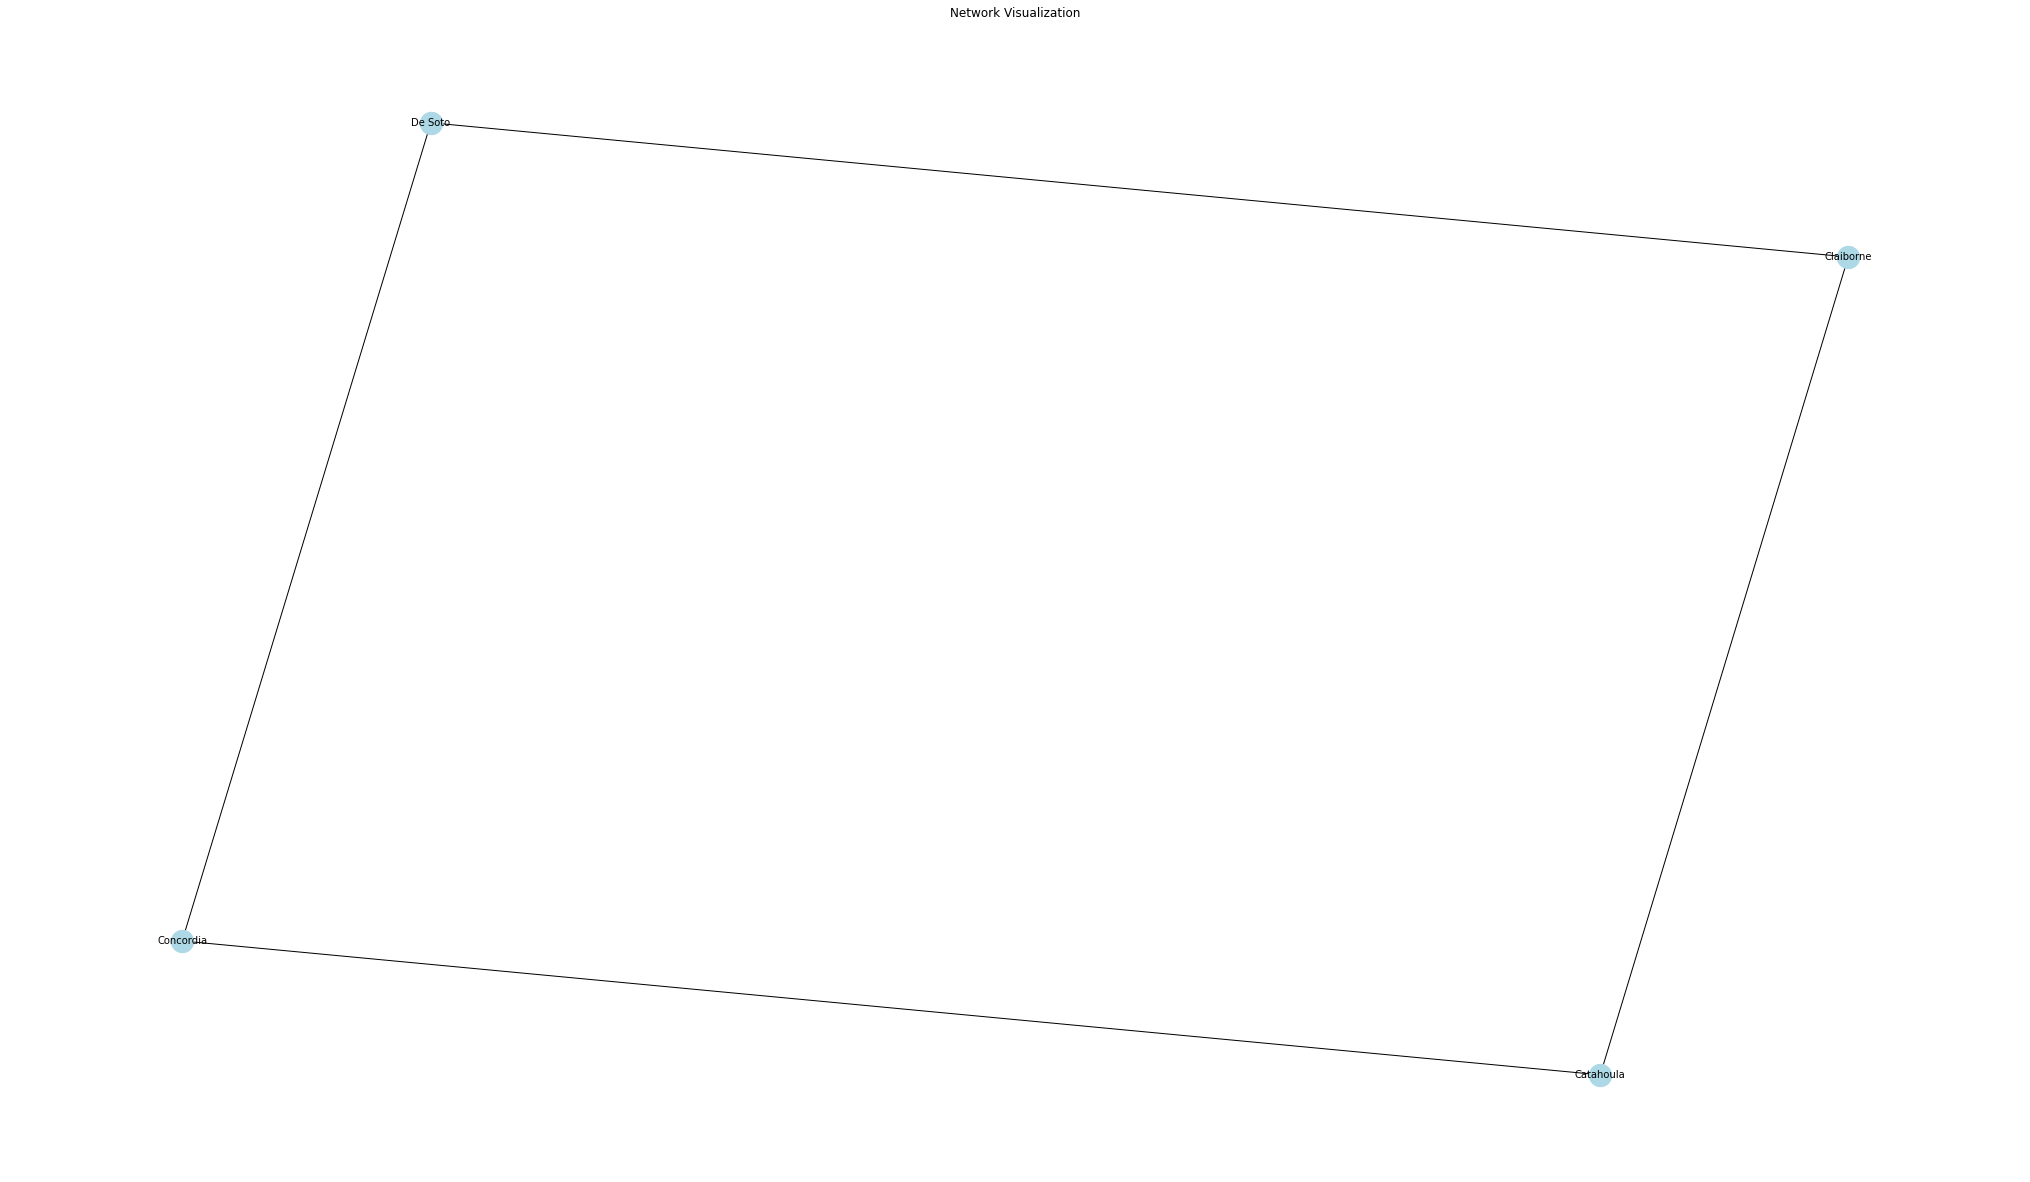

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype8.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 16})


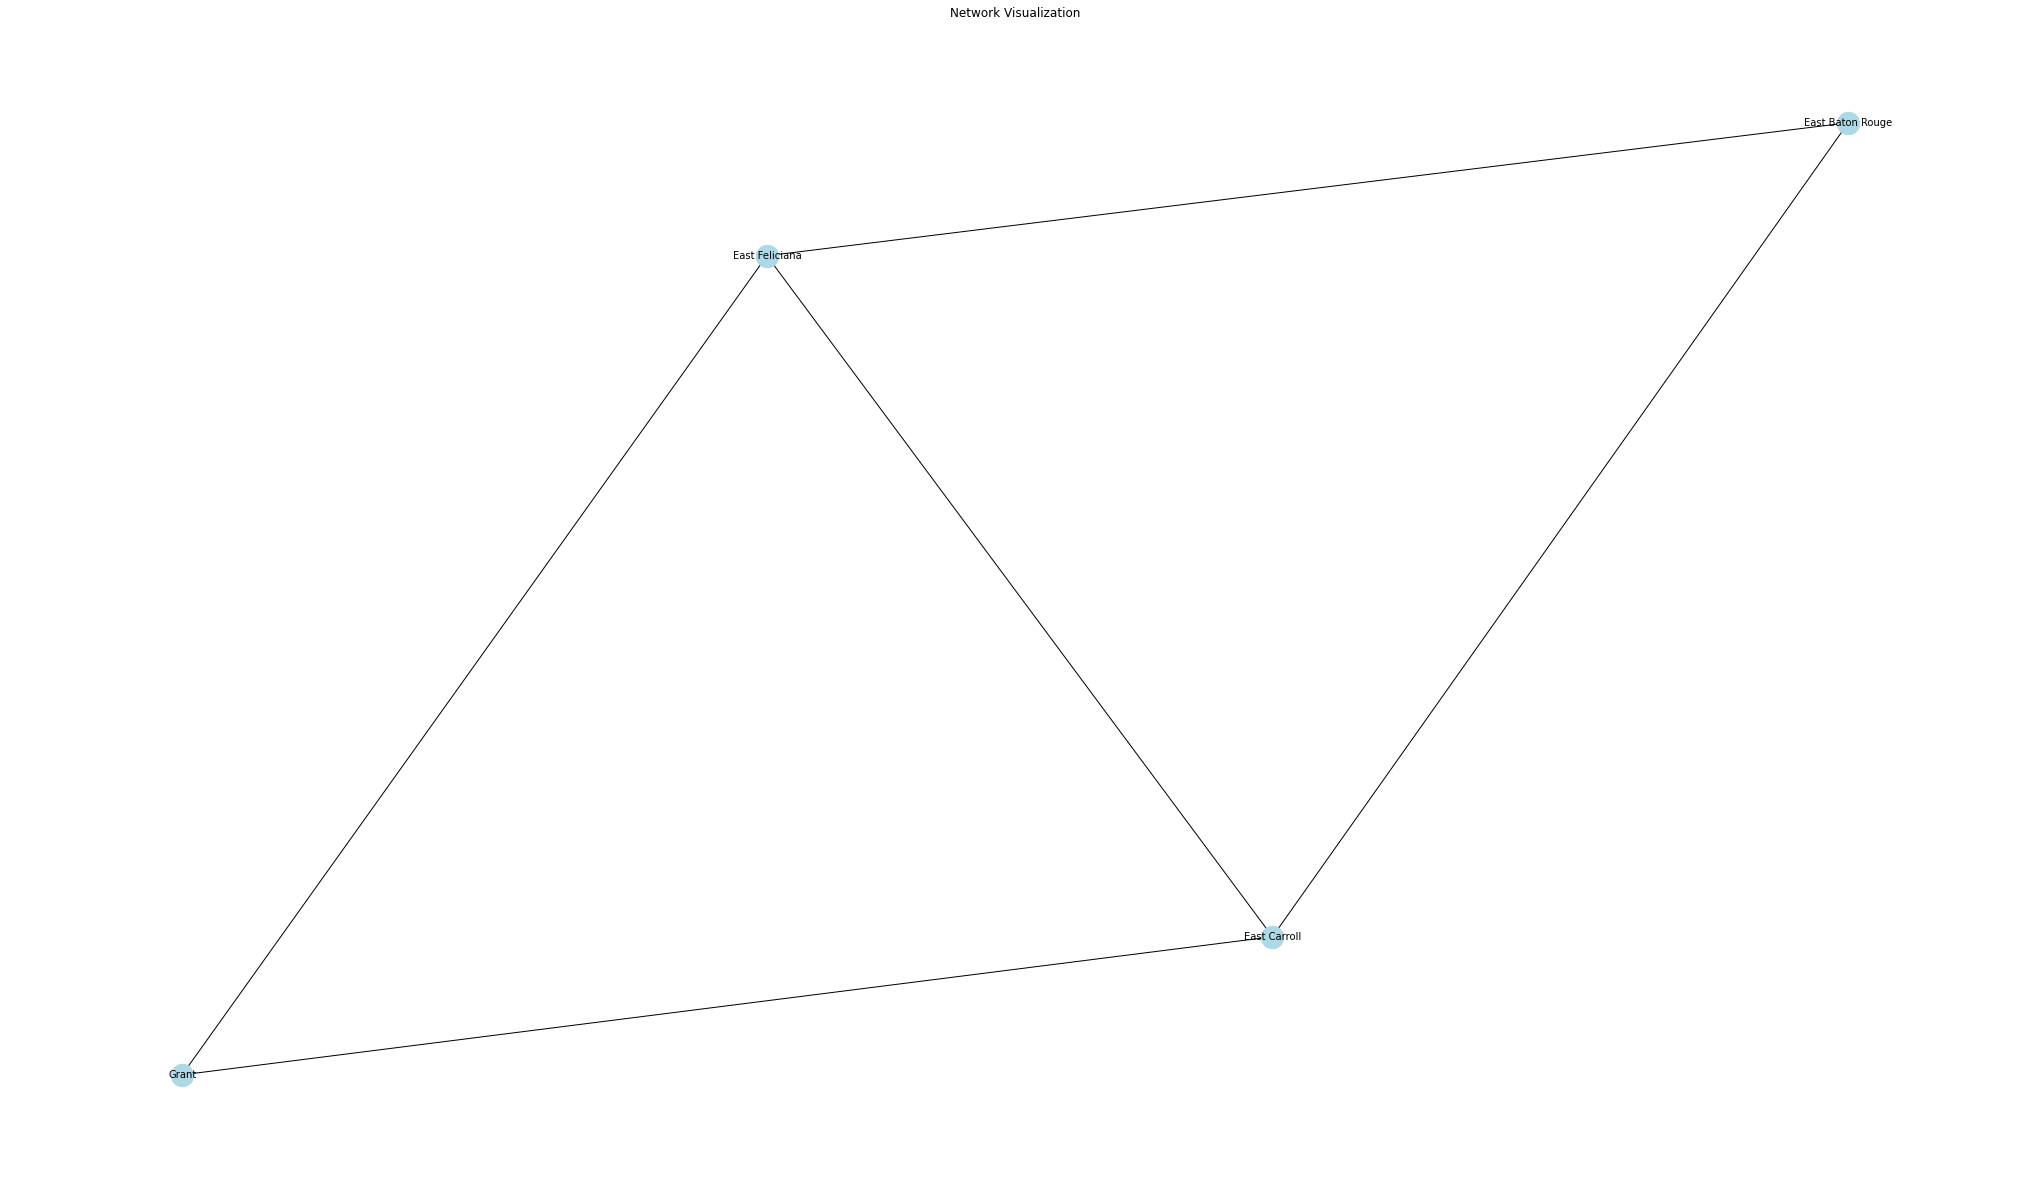

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype9.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
Subgraph Sizes and Counts: Counter({4: 24})


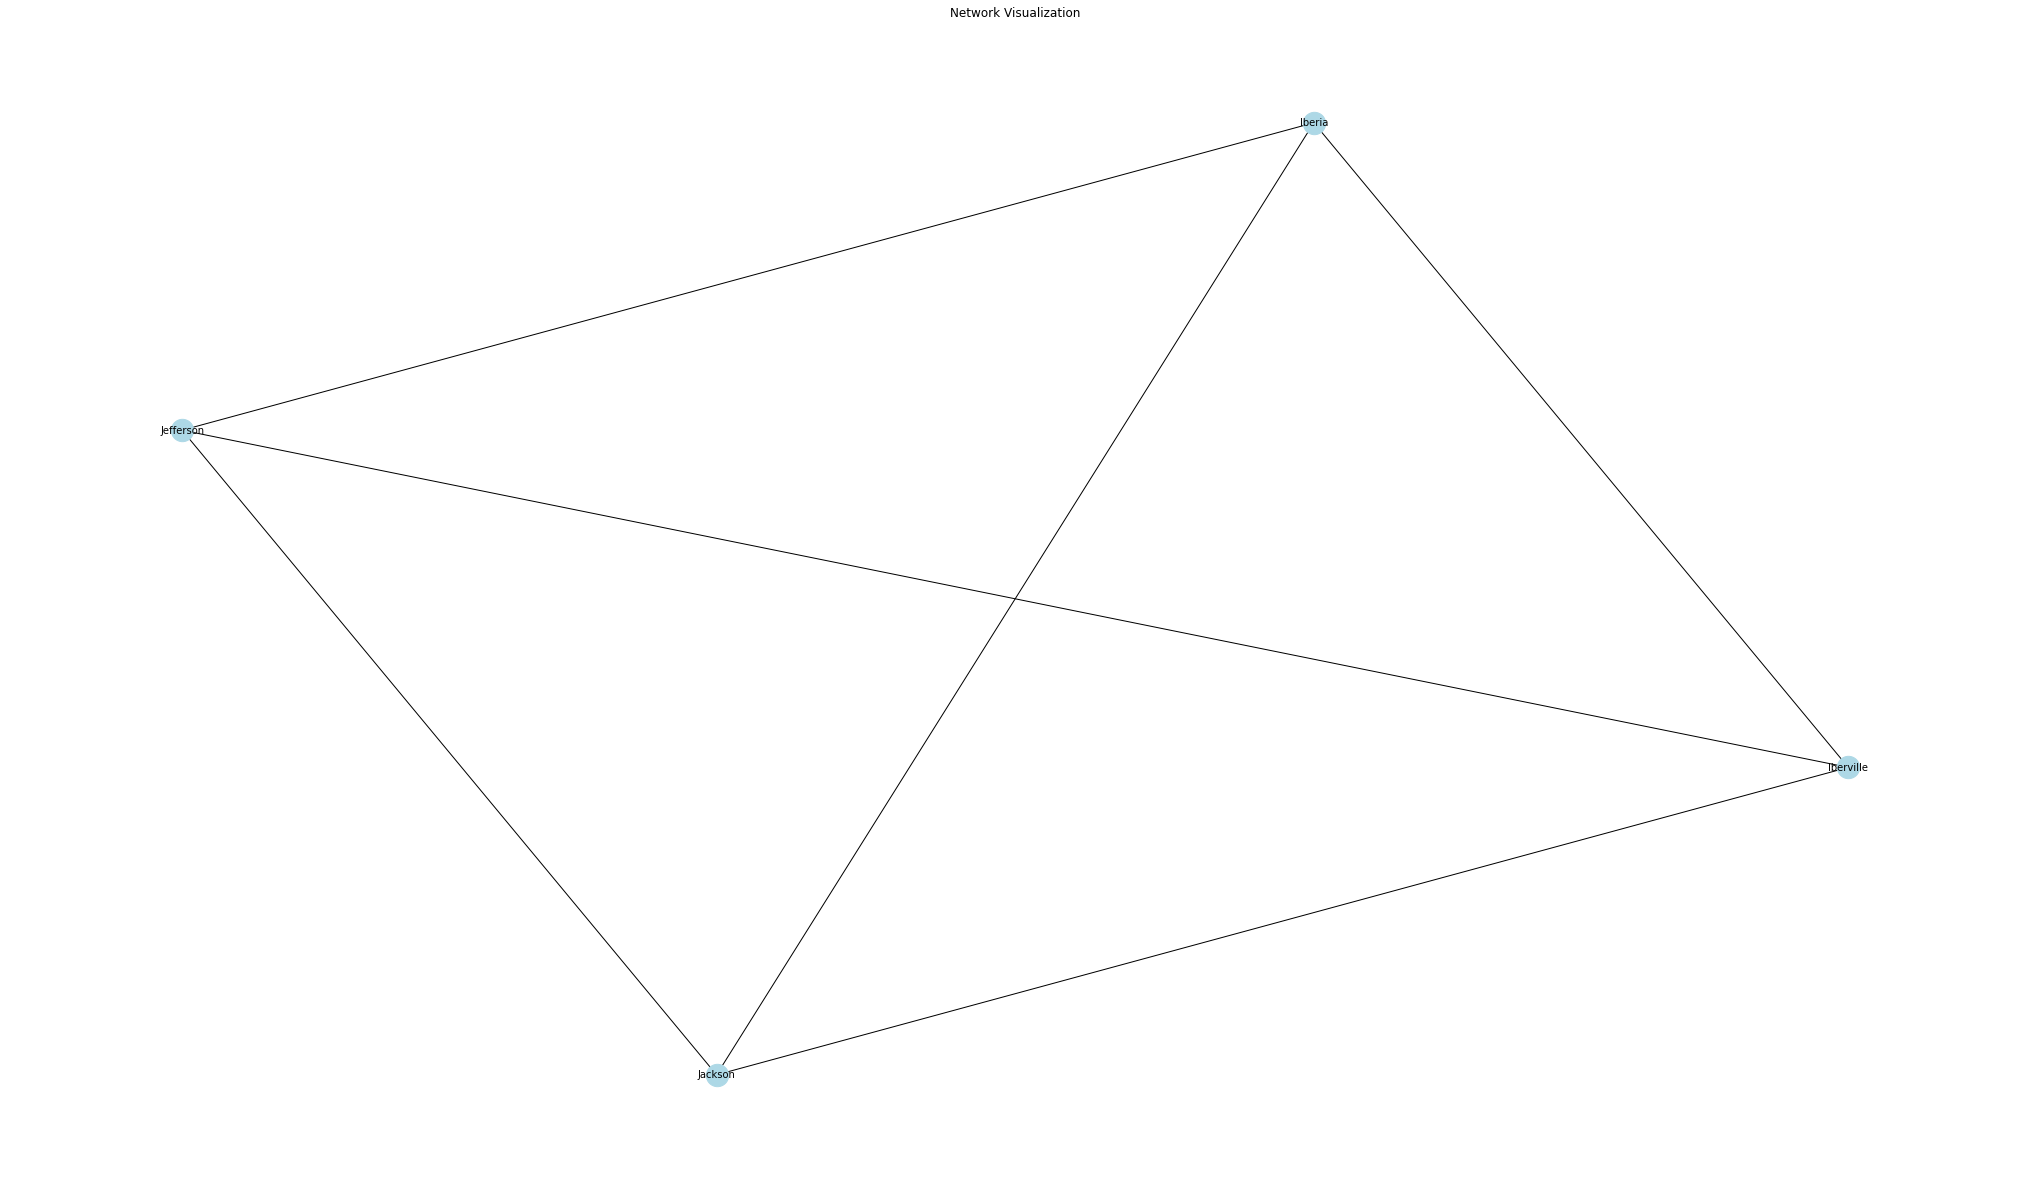

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype10.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetypesample.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]
targets_connected_to_C4 = [node for node in G.neighbors('C4')]

# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        
# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C4 = []
for i, target1 in enumerate(targets_connected_to_C4):
    for target2 in targets_connected_to_C4[i+1:]:
        common_targets_edges_C4.append((target1, target2))
        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)
G.add_edges_from(common_targets_edges_C4)

# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1


MemoryError: 

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Load your data from the CSV file
df = pd.read_csv('luisiana_edgetype4&6.csv')

# Create a NetworkX Graph from the DataFrame
G = nx.Graph()

# Iterate through the DataFrame to create edges
for i, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)
    
# Find all the targets connected to C1, C2, C3, and C4
targets_connected_to_C1 = [node for node in G.neighbors('C1')]
targets_connected_to_C2 = [node for node in G.neighbors('C2')]
targets_connected_to_C3 = [node for node in G.neighbors('C3')]


# Create edges between the targets that are common in collaboration with C1
common_targets_edges_C1 = []
for i, target1 in enumerate(targets_connected_to_C1):
    for target2 in targets_connected_to_C1[i+1:]:
        common_targets_edges_C1.append((target1, target2))

# Create edges between the targets that are common in collaboration with C2
common_targets_edges_C2 = []
for i, target1 in enumerate(targets_connected_to_C2):
    for target2 in targets_connected_to_C2[i+1:]:
        common_targets_edges_C2.append((target1, target2))

# Create edges between the targets that are common in collaboration with C3
common_targets_edges_C3 = []
for i, target1 in enumerate(targets_connected_to_C3):
    for target2 in targets_connected_to_C3[i+1:]:
        common_targets_edges_C3.append((target1, target2))
        

        
# Add the common target edges to the graph
G.add_edges_from(common_targets_edges_C1)
G.add_edges_from(common_targets_edges_C2)
G.add_edges_from(common_targets_edges_C3)


# Remove the source nodes (C1, C2, C3, C4)
G.remove_nodes_from(['C1', 'C2', 'C3', 'C4'])

# Get the connected components (subgraphs)
subgraphs = list(nx.connected_components(G))

# Count the number of subgraphs
num_subgraphs = len(subgraphs)
print("Number of subgraphs:", num_subgraphs)

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(list(Vsubgraph))
        return
    while len(Vextension) > 0:
        w = random.choice(list(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = set(graph.neighbors(w)) - Vsubgraph
        VpExtension = Vextension.union(NexclwVsubgraph)
        extend_subgraph(graph, Vsubgraph.union([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs for multiple sizes
def enumerate_subgraphs_multiple_sizes(graph, sizes):
    k_subgraphs = []
    for k in sizes:
        for node in graph.nodes():
            Vextension = set(graph.neighbors(node))
            extend_subgraph(graph, set([node]), Vextension, node, k, k_subgraphs)
    return k_subgraphs

# Specify the sizes for which you want to count subgraphs
sizes_to_count = [4, 6, 7, 8, 9, 10]

# Enumerate subgraphs of different sizes and count their occurrences
subgraph_sizes = enumerate_subgraphs_multiple_sizes(G, sizes_to_count)
subgraph_counts = Counter([len(sg) for sg in subgraph_sizes])
print("Subgraph Sizes and Counts:", subgraph_counts)

# Visualize the network
pos = nx.spring_layout(G, seed=42)  # Position the nodes for visualization

plt.figure(figsize=(28, 16))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Network Visualization")
plt.axis('off')
plt.show()

Number of subgraphs: 1
